# Note of the version changes.

## The link of revised visualization works can be find here:
https://us-west-2b.online.tableau.com/#/site/kevinvix/projects/28112/workbooks?order=name:asc

## In the first version “Deception”, all the works are data cleaning and visualization works done by Python. What I tried to acieve in revised version are using colab to finish all the work and thinking creative arguments for each finding. I want to use the visualization to become a part of data analysis , instead of presenting the facts.

## In the first version of "redesign", all the works were finished by Tableau only. So for the reviesd version, I will clean the data by using Python and still use the Tableau to do visualization. 

# In the Revised Version, what I want to achieve is to adopt the concept learned from the class, such as priciple of analytical design, dashboard design principles and the audiance model. Moreover, I will try to clean up the notebook to make the code easier to understand. The other improvement of the revised version will be specified in each finding. 

The following code is to install the packages.

In [5]:
!pip install xlrd
!pip install pygal
!pip install openpyxl
!pip install matplotlib
from scipy import *
from numpy import *
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.plotly as py
import pandas as pd 
import seaborn as sns
import pygal
import os
import matplotlib.pyplot as plt; plt.rcdefaults()
sns.set(color_codes=True)
%matplotlib inline
tls.set_credentials_file(username='username', api_key='api-key')

    100% |████████████████████████████████| 112kB 2.6MB/s 
    100% |████████████████████████████████| 133kB 3.3MB/s 
    100% |████████████████████████████████| 174kB 4.1MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ done
  Stored in directory: /content/.cache/pip/wheels/11/7d/47/3dad56b5d260c790d9110623ba66783a2ad345eb76dd63003b
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


# Revised Deceptive Version:

# Finding 1: US's firearm homecide rate is very low among those high violent countries!

# 1.Argument: 
From the data, I define the US is one of the high violent death countries. I want to argue that the firearm homicide rate of United States is low actually in these countries. 

# 2.Definition: 

a. I define the high violent death countries as those countries' violent death number is over than 5,000. 

b.The definition of Firearm Homicide Rate is the number of death by firearm per 100,000 People.

# 3.Reflection of the first version:
For the first version, I think the finding one is the unexpected and has the detailed data exploratory/wrangling steps. However, I don't think about the audience and interaction features that can produce the actionable insights. So for the revised version, I will think about audience targeting and create projection features. 


# 4.Audiance Targeting: 
Those people that interested in gun control Policy, especially those who want to against gun support. 

a.Want: To know the homicide death rate around the world and do the comparison for the situation among typical countries. 

b.Need: To prove that US homicide rate is not serious among typical countries and able to use this data to create some argument. 

c.Fear: It can be argued that if the definition of high violent country changes then results could be different. 

# 5.To show comparison and projection by creating another chart and dashboard

a. comparison: I put those country's number of firearm homicide and homicide rate together to show that the US has the lowest homicide rate among the high violent country.

b. I create a parament to do the number of death number projection. This lets people know if US's homicide rate change to one of these high violent countries, then how many people will die. This can make the argument more convincing since the projected number is lower than the current number. 



# Step 1 : Load the main data. The data can be found from the link below 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving death_rate_by_firearm.xlsx to death_rate_by_firearm.xlsx


In [4]:
death = pd.read_excel('death_rate_by_firearm.xlsx', index=False)
death.count()

Country (ISO 3166 Alpha-3)     219
Country                        219
Count                          219
Rate                           219
Unnamed: 4                       1
dtype: int64

# Step 2 : Data manipulation by choosing the columns I need and filtering the countries that qaulified as the high violent countries

In [5]:
death2 = death.iloc[:,1:4]
death3 =death2[death2.Count > death2.Count.quantile(.95)]
#death3 =death2.query('Count>=2000')
death3.sort_values("Country", inplace=True)
#death3.count()
death3= death3.reset_index(drop=True)
death3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,Count,Rate
0,Afghanistan,7073,20.409146
1,Brazil,44093,21.233995
2,Colombia,8714,17.910355
3,Democratic Republic of the Congo,4963,6.303331
4,Iraq,7460,20.052377
5,Mexico,11031,8.649023
6,Nigeria,10094,5.427184
7,Philippines,5825,5.637812
8,Syrian Arab Republic,9375,50.866899
9,United States,10147,3.149486


#Step 3: Choose the different columns as independent dataframe


In [0]:
country = death3.iloc[:,0]
count = death3.iloc[:,1]
rate = death3.iloc[:,2]

#Step 4: Give a overview of number of death of those high violent death countries. At here, I found the US ranks the 4th for number of death in 2016. 


Text(0.5,1,u'Number of death in high violent death countries in 2016')

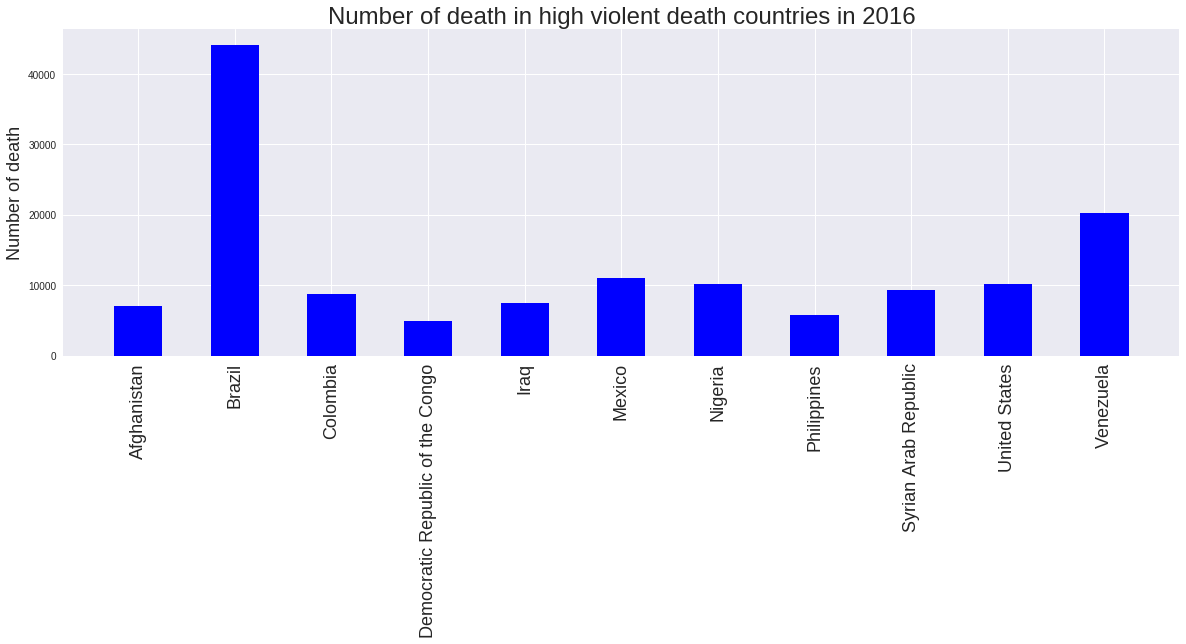

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 6
width = 0.5
plt.xticks(rotation=90 ,fontsize=18)
plt.bar(country, count, width, color="blue")
plt.ylabel('Number of death', fontsize=18)
plt.title('Number of death in high violent death countries in 2016', fontsize=24)

# Step 5: At this step , I proved my argument that US homecide rate is the lowest among its peers. 

Text(0.5,1,u'The firearm homecide rate of US is low among high violent countries')

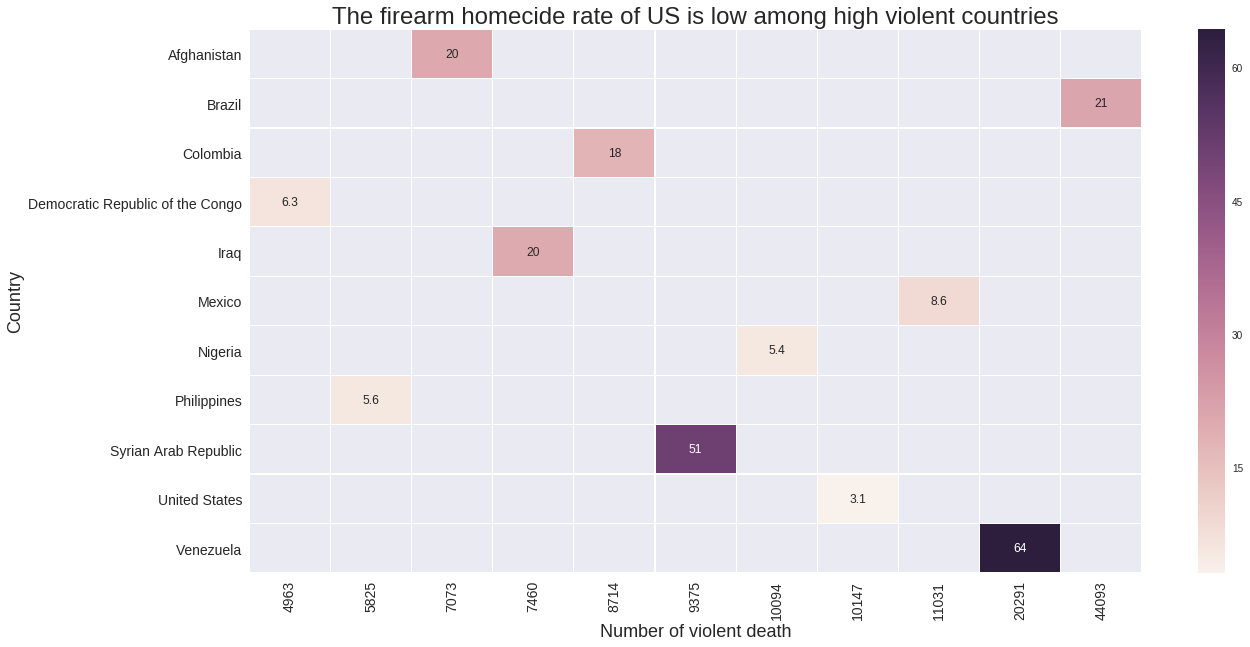

In [10]:
sns.set()

flights = death3.pivot("Country","Count" ,"Rate")

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(flights, annot=True, linewidths=.1, ax=ax)

plt.xticks(rotation=90 ,fontsize=14)
plt.yticks(rotation=0 ,fontsize=14)
plt.ylabel('Country', fontsize=18)
plt.xlabel('Number of violent death', fontsize=18)
plt.title('The firearm homecide rate of US is low among high violent countries', fontsize=24)

# Imporvement : Step 6 Load the population data of the counties in the world and data wrangling. I will combine the homicide and population data. The population data will be used to calculate the number of homicide death in US.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving API_SP.POP.TOTL_DS2_en_excel_v2_9944616.xls to API_SP.POP.TOTL_DS2_en_excel_v2_9944616.xls


In [9]:
Pop = pd.read_excel('API_SP.POP.TOTL_DS2_en_excel_v2_9944616.xls', index=True)
Country = Pop.iloc[3:,0]
Pop_2016 = Pop.iloc[3:,-2]
Pop1 = pd.concat([Country, Pop_2016], 1)
Pop1.columns = ['country', 'population']
Pop1.iloc[42,0] = 'Democratic Republic of the Congo'
Pop1.iloc[252,0] = 'Venezuela'
Pop2 = Pop1.loc[(Pop1['country'] == 'Afghanistan') | (Pop1['country'] == 'Brazil') | (Pop1['country'] == 'Colombia') | (Pop1['country'] == 'Democratic Republic of the Congo')| (Pop1['country'] == 'Iraq') | (Pop1['country'] == 'Mexico')| (Pop1['country'] == 'Nigeria') |(Pop1['country'] == 'Philippines')| (Pop1['country'] == 'Syrian Arab Republic')| (Pop1['country'] == 'United States')| (Pop1['country'] == 'Venezuela')]
Pop2.sort_values("country", inplace=True)
Pop2= Pop2.reset_index(drop=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
Top10 = pd.concat([death3, Pop2['population']], 1)

In [0]:
from google.colab import files
Top10.to_excel('Top10.xlsx')
files.download('Top10.xlsx')

# Improvement: Step 7. Use Tableau to do the final visulaization work. Please find the link below

https://us-west-2b.online.tableau.com/#/site/kevinvix/views/Finding1Revised/Dashboard?:iid=2

#Data resource:
Interactive Maps and Charts of Armed Violence Indicators
http://www.smallarmssurvey.org/?id=1253
Population
https://data.worldbank.org/indicator/SP.POP.TOTL

#Reference:
International Firearm Homicide Rates ,last updated on: 8/7/2017
https://gun-control.procon.org/view.resource.php?resourceID=006082

# Finding 2 To avoid the mass shooting, you might consider to live in the high crime rate cities.

# Argument and Definition

## 1.Argument: 
For this finding, I want to check the correlation between Mass Shooting and Crime Rate. In the end, I found out that the crime rate is not related to the number of people affected(death,injured) by Mass Shooting. 

## 2.Definition
a. The violent crime figures include the offenses of murder, rape (legacy definition), robbery, and aggravated assault.

b.The crime rate is the violent crime figure per 100,000 Inhabitants.

c.The number of people affected by mass shooting is to add the number of dead people and number of injured people in the mass shooting event.

## 3 Reflection of First Version
The first version, I find out the crime rate doesn't have the positive correlation with the number of people affected by the mass shooting. However, even the audience was convinced by this chart, they can't have the actionable insight. 

## 4.Audiance Targeting: 

Setting the audience as the people who want to relocate to another city or know their residential city's crime rate and mass shooting.

a.Want: To find which city is safe to live.

b.Need: To know the crime rate and mass shooting information in each city and to set the criteria on their own. 

c.Fear: The things happened in the future doesn't guarantee the things will follow the same trend in the future. And there is no reasonable projection of crime rate and mass shooting.

# Step 1 : Load the main dataset : Mass Shooting Event Level Data

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Mass Shooting Case All Years.xlsx to Mass Shooting Case All Years.xlsx


In [13]:
mass = pd.read_excel('Mass Shooting Case All Years.xlsx', index=False)
mass.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"May 16, 2018",Texas,Ponder,610 Lone Star Park Ln,5,1,NaN
1,"May 14, 2018",Maryland,Baltimore,2020 Etting St,0,4,NaN
2,"May 13, 2018",California,Stockton,2436 Belleview Street,3,2,NaN
3,"May 13, 2018",Mississippi,Byhalia,French Rd and Berta Rd,0,4,NaN
4,"May 13, 2018",California,Los Angeles,365 W Manchester Avenue,2,2,NaN


# Step 2: Data Manipulation: Clean the main dataset by choosing the columns I needed and create another column to sum the number of killed and injured. This new column is to know how many people were affected by Mass Shooting. I will use this variable to do the visualization and analysis.


In [14]:
mass_need = pd.concat([mass.iloc[:, mass.columns.get_loc('State'):mass.columns.get_loc('Address')], mass.iloc[:, mass.columns.get_loc('# Killed'):mass.columns.get_loc('Operations')]], axis=1)
mass_need['sum_of_kill_and_injured'] = mass_need['# Killed'] +mass_need['# Injured']
mass_need.head()
#mass_need.isnull().sum()

,State,City Or County,# Killed,# Injured,sum_of_kill_and_injured
0,Texas,Ponder,5,1,6
1,Maryland,Baltimore,0,4,4
2,California,Stockton,3,2,5
3,Mississippi,Byhalia,0,4,4
4,California,Los Angeles,2,2,4


In [15]:
print(mass_need['City Or County'].count())
print(mass_need['City Or County'].nunique())

500
263


# Step 3: combine the state and city/county columns as a new column. Group by location to know the number of people was affected by the mass shooting. This step is for further combination with another dataset.# Step 3: combine the state and city/county columns as a new column. Group by location to know the number of people was affected by mass shooting. This step is for further combination with another dataset.

In [32]:
mass_need["location"] = mass_need["State"].map(str) +' ' +mass_need["City Or County"]
mass_need.head()

,State,City Or County,# Killed,# Injured,sum_of_kill_and_injured,location
0,Texas,Ponder,5,1,6,Texas Ponder
1,Maryland,Baltimore,0,4,4,Maryland Baltimore
2,California,Stockton,3,2,5,California Stockton
3,Mississippi,Byhalia,0,4,4,Mississippi Byhalia
4,California,Los Angeles,2,2,4,California Los Angeles


In [33]:
mass_need_sum= mass_need.groupby(['location']).sum_of_kill_and_injured.sum()
mass_need_sum.columns = ['location', 'sum_of_kill_and_injured']
mass_need_sum.head()

location
Alabama Birmingham    14
Alabama Eutaw          5
Alabama Huntsville     4
Alabama Hurtsboro      4
Alabama Lanett         9
Name: sum_of_kill_and_injured, dtype: int64

In [0]:
from google.colab import files
mass_need_sum.to_excel('mass_need_sum.xlsx')
files.download('mass_need_sum.xlsx')

# Step 4: Load another dataset: City level Crime Rate in the US. I want to combine this dataset with the mass shooting dataset. By doing this, I can compare the city level crime rate and city level mass shooting statistic.

In [35]:
from google.colab import files
uploaded = files.upload()

Saving United States cities by crime rate.xlsx to United States cities by crime rate (1).xlsx


In [36]:
crime = pd.read_excel('United States cities by crime rate.xlsx', index=False)
crime.head()

,State,City,Population,Total Violent Crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
0,Minnesota,Bloomington,84596,NaN,-,NaN,69.7,74.5,3796.9,268.3,3437.5,91.0
1,Minnesota,Brooklyn Park,77346,NaN,5.2,NaN,117.7,157.7,3399.0,637.4,2587.1,174.5
2,Minnesota,Burnsville,61218,NaN,-,NaN,27.8,140.5,2956.6,330.0,2509.1,117.6
3,Minnesota,Coon Rapids,62301,NaN,1.6,NaN,25.7,67.4,3077.0,311.4,2669.3,96.3
4,Minnesota,Duluth,86830,NaN,2.3,NaN,103.7,245.3,4446.6,739.4,3509.2,198.1


# Step 5: Choose the columns that I need for analysis. At here, I just use column Total Violent Crime(Rate)


In [37]:
crime_rate = pd.concat([crime.iloc[:, crime.columns.get_loc('State'):crime.columns.get_loc('Population')], crime.iloc[:, crime.columns.get_loc('Total Violent Crime'):crime.columns.get_loc('Murder and nonnegligent manslaughter')]], axis=1)
crime_rate.tail()

,State,City,Total Violent Crime
595,Connecticut,Greenwich,37.1
596,Texas,Flower Mound,30.9
597,Indiana,Fishers,17.6
598,Indiana,Carmel,13.4
599,Minnesota,Rochester,NaN


#Step 6: clean the dataset by removing the NaN. Some total violent crime shows Nan, so I need to remove those rows for further analysis. I double checked there is not NaN in my dataset.

In [38]:
crime_rate_clean = crime_rate[pd.notnull(crime_rate['Total Violent Crime'])]
#verify there is no nan in the dataset
crime_rate_clean.isnull().sum()

State                  0
City                   0
Total Violent Crime    0
dtype: int64

# Step 7: combine the state and city/county columns into a new column named "location". For this way, I can combine two datasets together.

In [39]:
crime_rate_clean["location"] = crime_rate_clean["State"].map(str) +' ' +crime_rate_clean["City"]
crime_rate_clean.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,State,City,Total Violent Crime,location
10,Michigan,Flint,2729.5,Michigan Flint
11,New Jersey,Camden,2566.1,New Jersey Camden
12,Missouri,St. Louis,1817.1,Missouri St. Louis
13,Michigan,Detroit,1759.6,Michigan Detroit
14,Tennessee,Memphis,1740.1,Tennessee Memphis


In [0]:
from google.colab import files
crime_rate_clean.to_excel('crime_rate_clean.xlsx')
files.download('crime_rate_clean.xlsx')

In [103]:
from google.colab import files
uploaded = files.upload()

Saving sum_of_kill_and_injured_join.xlsx to sum_of_kill_and_injured_join (4).xlsx


In [104]:
join = pd.read_excel('sum_of_kill_and_injured_join (4).xlsx', index=False)
join1 = join.iloc[:,0:3]
join_sorted = join1.sort_values(by='Violent Crime', ascending=False)
join2 = join_sorted [join['sum_of_kill_and_injured_join'] ==0]
join2.count()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



location                        0
Violent Crime                   0
sum_of_kill_and_injured_join    0
dtype: int64

In [114]:
join_sorted_clean = join_sorted[pd.notnull(join_sorted['sum_of_kill_and_injured_join'])]
#verify there is no nan in the dataset
join_sorted_clean.head()

,location,Violent Crime,sum_of_kill_and_injured_join
338,michigan flint,2729.5,12.0
377,new jersey camden,2566.1,4.0
336,michigan detroit,1759.6,34.0
488,tennessee memphis,1740.1,49.0
202,delaware wilmington,1703.5,4.0


# Step 8: Due to the violent crime figure in each city is different and make the analysis harder, I categories the crime rate into 3 level ( high, middle and low). For this way, I can better analyze the relationship between crime rate and mass shooting.

In [115]:
print(join_sorted_clean['Violent Crime'].max()) # Max
print(join_sorted_clean['Violent Crime'].min()) # Min
print((join_sorted_clean['Violent Crime'].max()-join_sorted_clean['Violent Crime'].min())/5) 
print(join_sorted_clean['sum_of_kill_and_injured_join'].mean()) # Max

2729.5
61.9
533.52
16.8099173553719


In [107]:
join_sorted_clean['crime_rate'] = join_sorted_clean['Violent Crime'].apply(lambda x: 'Very Low' if x <= (61.9+533.5) else 'Low'  \
                                                                                        if x<=(61.9+533.5*2) else 'Medium'\
                                                                          if x<=(61.9+533.5*3) else 'High'\
                                                                           if x<=(61.9+533.5*4) else 'Very High')
join_sorted_clean.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,location,Violent Crime,sum_of_kill_and_injured_join,crime_rate
338,michigan flint,2729.5,12.0,Very High
377,new jersey camden,2566.1,4.0,Very High
336,michigan detroit,1759.6,34.0,High
488,tennessee memphis,1740.1,49.0,High
202,delaware wilmington,1703.5,4.0,High


In [0]:
join_label =(join_sorted_clean.groupby(['crime_rate', 'sum_of_kill_and_injured_join'], as_index=False).mean())

In [109]:
join_label2 =(join_label.groupby(['crime_rate']).mean())
join_label2.sort_values(by='sum_of_kill_and_injured_join', ascending=False)

,sum_of_kill_and_injured_join,Violent Crime
crime_rate,,
Low,46.230769,855.427179
High,29.000000,1734.400000
Medium,18.636364,1380.500000
Very Low,11.615385,447.864829
Very High,8.000000,2647.800000


# Step 9: visualization: Compare the crime rate with the mass shooting. Surprisingly, I found that they are negatively correlated. 

Text(0,0.5,u'Number of People affected by Mass Shooting')

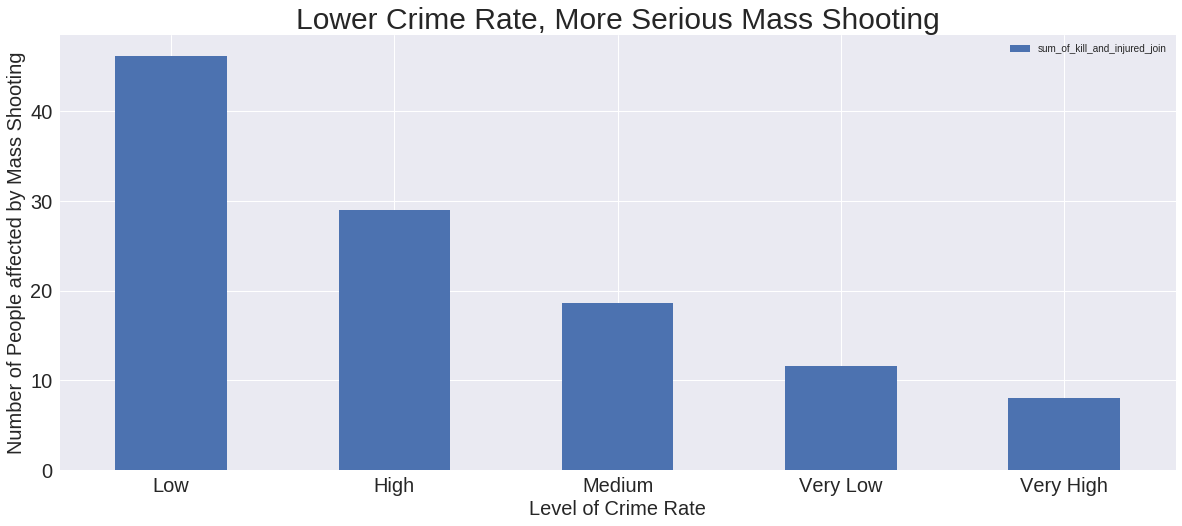

In [110]:
df2 = pd.DataFrame(join_label2, columns=['sum_of_kill_and_injured_join'])
df2 = df2.sort_values(by='sum_of_kill_and_injured_join', ascending=False)

ax = df2.plot.bar(stacked=True, figsize=(20,8), legend=True, fontsize=20, align='center')
ax.set_title('Lower Crime Rate, More Serious Mass Shooting',fontsize=30)
ax.set_xlabel("Level of Crime Rate",fontsize=20,rotation=0)
plt.xticks(rotation=0)
ax.set_ylabel("Number of People affected by Mass Shooting",fontsize=20)

In [0]:
from google.colab import files
join_sorted_clean.to_excel('Crime_and_massshooting.xlsx')
files.download('Crime_and_massshooting.xlsx')

# Improvement: Step 10 : Final Visualization on Tableau and Provide Actionable decision. 

After proved that living in the Very High/Low Crime Rate city can have less impact by the mass shooting, I like to show those cities that people can choose which city better places to live on. 

Considered people will not just want to avoid the mass shooting but also the high crime rate, so I crate filter just show the cities that qualify both criteria. 

For the crime rate, I select those cities whose violent crime rate is below 386, which is below the average of US. For the number of people affected by Mass Shooting, I select those cities the whole number is below 17, the mean value of the cities in this dataset. 

From this dashboard, I can select the cities depends on crime rate and historical mass shooting information. It can benefit those people who want to relocate to another city. Moreover, the audience can also do a further analysis between different crime rate and mass shooting. 


The link is https://us-west-2b.online.tableau.com/#/site/kevinvix/workbooks/36119/views


# Data Resource:

United States cities by crime rate (60,000–100,000)
https://en.wikipedia.org/wiki/United_States_cities_by_crime_rate_(60,000%E2%80%93100,000)

United States cities by crime rate (100,000–250,000)
https://en.wikipedia.org/wiki/United_States_cities_by_crime_rate_(100,000%E2%80%93250,000)

List of United States cities by crime rate
https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate

MASS SHOOTINGS   
http://www.gunviolencearchive.org/mass-shooting

# Reference:
Villent Crime Rate in US
https://www.statista.com/topics/1750/violent-crime-in-the-us/


# Finding 3: When Gun Ownership Rate is higher, the Murder Rate is lower

# Argument and Definition

## 1.Argument: 
I want to review the relationship between the US gun ownership rate and murder rate. I want to argue that when people know people around themselves have the gun, they will hesitate to murder the others. 

## 2.Definition:
a. The murder rate is number of Murder and nonnegligent manslaughter per 100,000 people. The states whose murder rates over than 10.85 are considered high-level murder rate state. Otherwise is low murder rate states

b.Gun ownership rate is number of gun per 100 people

## Improvement 3.Reflection of First Version:
At the first Version, I simplified the relation by separating murder rate and Gun ownership rate into 2(high and low ) level. Although the finding is unexpected and interesting. But the audience can not get deeper understanding by comparison or change the variables to see the difference. 

So the reviesed version, I try to make it more complicated enough for doing the analysis of different stages. I categorized the murder rate and ownership rates for 3 levels( Low, Medium, High). Then I can select one of variables to see the changes of the other variable. 

For example, I can find for those stated defined high gun ownership rate, states in the south-east have medium murder rate, but other states have low murder rates. This finding is the further analysis of the first version. I can change my argument to "even gun ownership is high, the murder rates in north-west states are still low. 

## Improvement 4.Targeting Audience:

The audience can be those people care about gun control, such as gun manufacturers/sellers, legislators, and related NPOs.

a.want: To know the relationship between gun ownership rate and murder rate 

b.need: To prove that gun ownership rate and the murder rate has the positive/negative correlation in different states and base on this correlation, that audience can make the argument for their interests or provide the analysis.

c.fear: Can's find the relationship between this two variables or it can easily find the exception in typical one states. 

# Step 1: Load the main dataset: Gun ownership rate in each state of US. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Gun Ownership by State.xlsx to Gun Ownership by State.xlsx


In [0]:
gun_ownership = pd.read_excel('Gun Ownership by State.xlsx', index=False)


#Step 2: Data Manipulation by choosing the columns needed for analysis and changing names of the columns.

In [5]:
gun_ownership = gun_ownership.iloc[:,0:2]
gun_ownership.columns = ['country','ownership_rate']
gun_ownership.sort_values("country", inplace=True)
gun_ownership.head()

,country,ownership_rate
0,Alabama,48.9
1,Alaska,61.7
2,Arizona,32.3
3,Arkansas,57.9
4,California,20.1


# Step 3: Download the dataframe for further combination and analysis

In [0]:
from google.colab import files

gun_ownership.to_excel('gun_ownership_combine.xlsx')
files.download('gun_ownership_combine.xlsx')

# Step 4: Upload the state level crime rate dataset for data manipulation

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Crime by State 2016.csv to Crime by State 2016.csv


In [0]:
crime_state = pd.read_csv('Crime by State 2016.csv', index_col=False)


#Step 5: Clean the dataset by choosing data in 2016 and columns that need for further analysis. 

In [9]:
is_2016 =  crime_state['Year']==2016
crime_state_2016 = crime_state[is_2016]
crime_state_2016.head()

,Area,Year,Population2,Violent crime,"Violent crime Rate per 100,000",Murder and nonnegligent manslaughter,"Rate per 100,000",Rape (revised definition)4,"Rate per 100,000.1",Rape (legacy definition)5,...,Aggravated assault,"Rate per 100,000.4",Property crime,"Rate per 100,000.5",Burglary,"Rate per 100,000.6",Larceny-theft,"Rate per 100,000.7",Motor vehicle theft,"Rate per 100,000.8"
1,Alabama,2016,4863300,25886,532.3,407,8.4,1916,39.4,1385,...,18877,388.2,143362,2947.8,34065,700.5,97574,2006.3,11723,241.1
3,Alaska,2016,741894,5966,804.2,52,7.0,1053,141.9,757,...,4011,540.6,24876,3353.0,4053,546.3,17766,2394.7,3057,412.1
5,Arizona,2016,6931071,32583,470.1,380,5.5,3290,47.5,2452,...,21858,315.4,206432,2978.4,37736,544.4,150275,2168.1,18421,265.8
7,Arkansas,2016,2988248,16461,550.9,216,7.2,2143,71.7,1545,...,11982,401.0,97673,3268.6,23771,795.5,66747,2233.6,7155,239.4
9,California,2016,39250017,174796,445.3,1930,4.9,13702,34.9,10149,...,104375,265.9,1002070,2553.0,188304,479.8,637010,1623.0,176756,450.3


In [10]:
crime_state_select = pd.concat([crime_state_2016.iloc[:, crime_state_2016.columns.get_loc('Area'):crime_state_2016.columns.get_loc('Year')],\
                                crime_state_2016.iloc[:, crime_state_2016.columns.get_loc('Rate per \n100,000'):crime_state_2016.columns.get_loc('Rape\n(revised definition)4')]], axis=1)
crime_state_select.columns = ['country', 'murder_rate']
crime_state_select.sort_values("country", inplace=False)
crime_state_select.head()

,country,murder_rate
1,Alabama,8.4
3,Alaska,7.0
5,Arizona,5.5
7,Arkansas,7.2
9,California,4.9


# Step 6: Download the dataframe for further combination and analysis

In [0]:
from google.colab import files
crime_state_select.to_excel('crime_state_select.xlsx')
files.download('crime_state_select.xlsx')

# Step 7: Upload the dataframe for further combination and analysis. The two dataset was combined through excel by vlookup function.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving crime_state_select_combine_ownership.xlsx to crime_state_select_combine_ownership.xlsx


In [13]:
combine = pd.read_excel('crime_state_select_combine_ownership.xlsx')
combine_sorted = combine.sort_values(by='ownership_rate', ascending=False)
combine_sorted.head()

,country,murder_rate,ownership_rate
2,Alaska,7.0,61.7
4,Arkansas,7.2,57.9
13,Idaho,2.9,56.9
49,West Virginia,4.4,54.2
51,Wyoming,3.4,53.8


# Step 8: Get a overview of murder rates in each state by visualizaton. This is not the final visualization of finding 3.  

Text(0.5,1,u'Murder Rates In each US State')

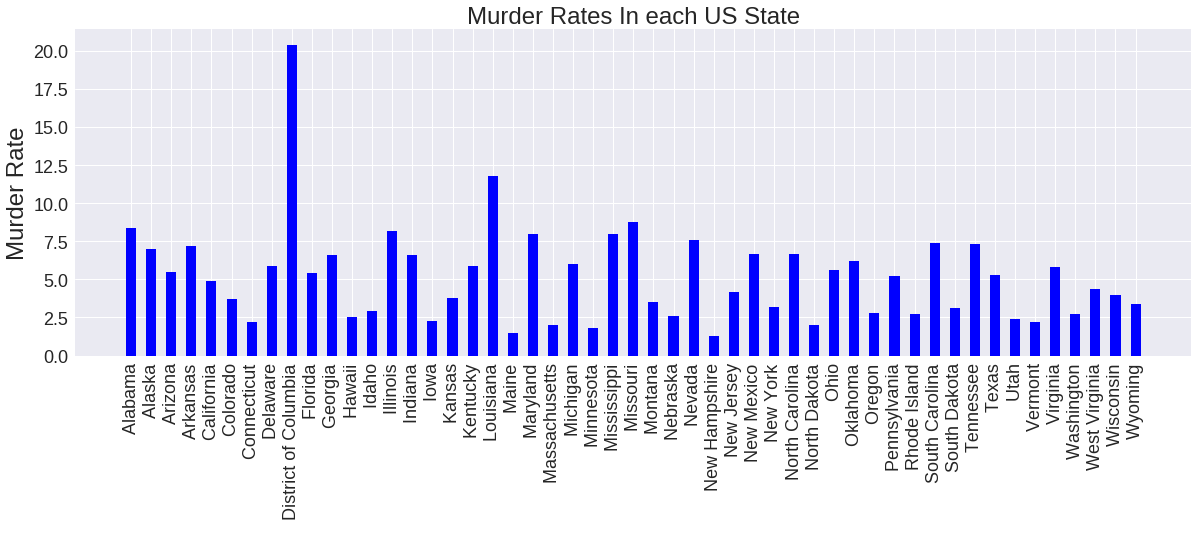

In [14]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 6
width = 0.5
plt.xticks(rotation=90 ,fontsize=18)
plt.yticks(rotation=0 ,fontsize=18)
plt.bar(combine_sorted['country'], combine_sorted['murder_rate'], width, color="blue")
plt.ylabel('Murder Rate', fontsize=24)
plt.title('Murder Rates In each US State', fontsize=24)

# Step 9 : Separate the murder rate into two levels(high and low)

In [15]:
print(combine_sorted['murder_rate'].max()) # Max
print(combine_sorted['murder_rate'].min()) # Min
print((combine_sorted['murder_rate'].max()-combine_sorted['murder_rate'].min())/2) # 

20.4
1.3
9.549999999999999


In [16]:
combine_sorted['murder_rate_level'] = combine_sorted['murder_rate'].apply(lambda x: 'Low' if x <= (1.3+9.55) else 'High')
combine_sorted.head()

,country,murder_rate,ownership_rate,murder_rate_level
2,Alaska,7.0,61.7,Low
4,Arkansas,7.2,57.9,Low
13,Idaho,2.9,56.9,Low
49,West Virginia,4.4,54.2,Low
51,Wyoming,3.4,53.8,Low


# Step 10: Calculate the average value of murder rate and gun ownership rate in each level of murder rate.

In [17]:
combine_label =(combine_sorted.groupby(['murder_rate_level'], as_index=False).mean())
combine_label.sort_values("ownership_rate", inplace=False)

,murder_rate_level,murder_rate,ownership_rate
0,High,16.100000,32.600000
1,Low,4.763265,32.961224


In [18]:
combine_label['ownership_rate_level'] = combine_label['ownership_rate'].apply(lambda x: 'Low' if x <= (32.6) else 'High')
combine_label.head()

,murder_rate_level,murder_rate,ownership_rate,ownership_rate_level
0,High,16.100000,32.600000,Low
1,Low,4.763265,32.961224,High


# Step 11: Visualization that proves when gun ownership is high, the murder rate is acually low. 

Text(0.5,1,u'Surprise! When gun ownership rate is high ,the murder rate is low')

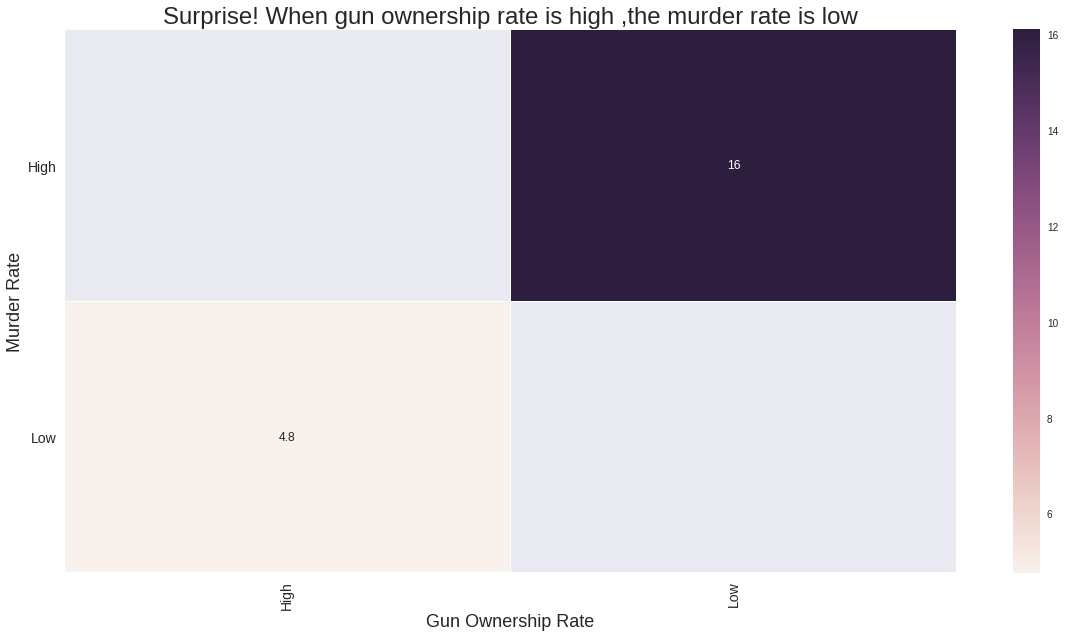

In [20]:
sns.set()

comp = combine_label.pivot("murder_rate_level","ownership_rate_level", "murder_rate")

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(comp, annot=True, linewidths=.1, ax=ax)

#plt.legend(fontsize=20)    # legend fontsize
plt.xticks(rotation=90 ,fontsize=14)
plt.yticks(rotation=0 ,fontsize=14)
plt.ylabel('Murder Rate', fontsize=18)
plt.xlabel('Gun Ownership Rate', fontsize=18)
plt.title('Surprise! When gun ownership rate is high ,the murder rate is low', fontsize=24)


# Improvement: Step 12: Download the dataframe for further combination and analysis

In [0]:
from google.colab import files
combine_sorted.to_excel('murder_rate_ownership_rate.xlsx')
files.download('murder_rate_ownership_rate.xlsx')

# Improvement: Step 13: Final Visualization and some explanations

I use the clean data to do the final visualization on Tableau. I think this is very helpful to analyze the relationship between murder rate the gun ownership rate. There is three level for each variable. By setting the 3 levels of these two variables and adding a filter function, we can better understand or find the relationship between these two variables.

For example, I find for those states whose gun ownership rates in high level, the murder rates in north-west states are lower than south east states. This visualization helps the audience do the comparison easily. Another example is when the gun ownership rate is low, the chart shows that the murder rates are low and the states are mostly located in northeast of US.

##Data Resource:

Crime in the United States1
by Region, Geographic Division, and State, 2015–2016

https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-2

Gun ownership and social gun culture Bindu Kalesan,1 Marcos D Villarreal,1 Katherine
M Keyes,1 Sandro Galea

http://injuryprevention.bmj.com/content/injuryprev/early/2015/06/09/injuryprev-2015-041586.full.pdf?keytype=ref&ijkey=doj6vx0laFZMsQ2

# Revised Redesign Version


# Finding 1: Avoid Cheery Picking! Show the homicide rate around the world and found homicide rate in the US is not high at all. 

From the article, we know that America has six times as many firearm homicides as
Canada, and nearly 16 times as many as Germany. For this homicides visualization in
the article, I can only know some advanced countries’ situation. First of all, I think the
author did the cherry picking for this visualization work by putting America into the
country of highest homicide rate. Secondly, I am so curious about the situation in other
countries and their historical trends. As for the 1st visualization finding, I plan to
reproduce the homicides rate around the world.
For the visualization process, here are my steps.

According to the problem statement, I already find the data resource which is an excel
file that can be download from http://www.smallarmssurvey.org/?id=1253. After
downloaded the file, I checked information and decided what variable and type of graph
are better to use. Here is some key information from the data which will decide the
visualization chart and limitations. There are 221 countries data. Violent Deaths rate
data is a time series data from 2004 to 2016 and Violent Deaths by firearm in 2016 with
count and rate.

## Step 1: Download the dataset and data wraggling.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Small-Arms-Survey-DB-violent-deaths.xlsx to Small-Arms-Survey-DB-violent-deaths.xlsx


In [0]:
violent = pd.read_excel('Small-Arms-Survey-DB-violent-deaths.xlsx', index=False)
violent1= violent.reset_index(drop=True)
violent_country=violent1.iloc[:,2]
violent_country
violent_rate = violent1.iloc[:,19]
violent_rate
violent_count = violent1.iloc[:,18]
violent_count
violent_combine = pd.concat([violent_country, violent_rate,violent_count], 1)

In [95]:
violent_combine.columns = ['country', 'rate', 'count']
violent_combine1 =violent_combine.iloc[2:,:]
violent_combine2 = violent_combine1[violent_combine1['count'] >= 1]
violent_combine2.sort_values('rate',inplace=True)
violent_combine2.count()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



country    212
rate       212
count      212
dtype: int64

## Step 2. Download the data for visualization in Tableau 

In [0]:
from google.colab import files
violent_combine2.to_excel('violent_combine2.xlsx')
files.download('violent_combine2.xlsx')

## Step 3. To group the homicide rate in 5 group, I calculate the range of homicide rate.

For the homicide rate in each coutry, if the value is from 0 to 31.7, I define it as the level 1. From 31.7 to 63.4, I definre as level 2. Adopting the same methodology, I define the Level 1 to Level 5 of the homicide rate in each country. 

In [97]:
print(violent_combine2.rate.max())
print(violent_combine2.rate.min())
print((violent_combine2.rate.max()-violent_combine2.rate.min())/5)

158.807816607
0.0778269471135
31.7459979319


## Improvement: Step 4 Visualization on Tabluea.
The first version can be found here:https://github.com/mcchiang06/Visualization-Work/blob/master/Viz%20First%20Versions%20Final.pdf

At the first version. I didn't use Python to do all the data cleaning. I changed this to the revised version to make it reproducible. Moreover, for the first version, I simply showed the fact of the violent death rate by firearm and sort it by rate. From the class, I learn to use the color to show the meaning, so you can find the revised version, I use the color to distinguish the level of Homicide Rate. I also use the size to show the violent deaths. Using color and size to make the audience do the comparison better.

Thirdly, I create this visualization to be more analytical. I set the homicide rate into 5 levels. It will be easier to do the comparison of homicide rate (by color) and of violent(by size) in its level. For example, at the homicide rate level 3, we can see the country with the highest homicide rate is Jamaica but Brazil has the highest deaths. 

Finally, at the first version, I use the map and color to demonstrate the homicide rate in each country and the bar chart to show the homicide figures. However, at the revised version, I use the map, combined with color, label and size functions. I can simply show all the information in one map chart. 

Back to the finding, this visualization can show US's homicide rate is not high among the countries in the world simply by seeing the color. Moreover, we can also know deaths number of US is also not high among the countries in the world


#Data resource:
Interactive Maps and Charts of Armed Violence Indicators
http://www.smallarmssurvey.org/?id=1253

#Reference:
International Firearm Homicide Rates ,last updated on: 8/7/2017
https://gun-control.procon.org/view.resource.php?resourceID=006082

# Finding 2:Homicide Death Rate by Firearm State-Level Analysis. 
Some insteresting finding for the revised version are like large population states' homicide rate are normally good and small population states in south US has higher homicide rates. 


From the finding 1, I found the homicide rate by firearm is relatively lower than other countries. To
know more about the homicide by firearm situation in America. I would like to do the
visualization to find out the number of homicide in different states in America.

# Step 1:Download and data manipulation.
a. The main date resource is database of the Gun Violence Archive website. 
The user can customize the filters to download data. So, the filters I use includes
A. Date: Year in 2016, which is consistent with finding 1.
B. Incident character: contains Shot-death(murder,accidental,suicide)
C. Incident character: doesn’t contain Shot-death(accidental)
D. Incident character: doesn’t contain Shot-death(suicide)

b. Another data I need to use is the population by state in 2016. So, I download from United Census Bureau.

The data manipulation procress was documented in the first version. Please find at the link https://github.com/mcchiang06/Visualization-Work/blob/master/Viz%20First%20Versions%20Final.pdf

At here , I just use the result of the previous work. 

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Homicide 2016.xlsx to Homicide 2016 (2).xlsx


In [22]:
Homicide = pd.read_excel('Homicide 2016 (2).xlsx', index=False)
Homicide.head()

,State,Killed,Population,"Homicide Rate (per 1,000,000)"
0,Alabama,18,4860545,3.703288
1,Alaska,4,741522,5.394311
2,Arizona,7,6908642,1.013224
3,Arkansas,11,2988231,3.681108
4,California,47,39296476,1.196036


# Step 2: Data Visualization
# Reflection: 
For the first version. I use the map chart and bar chart to show the level of homicide rate in each state of US. Apparently, the visualization is to show the fact and let the reader know which state has higher/lower homicide rate and check the statistic. 

#Action after Reflection:
For the Revised version, I create more analysis function to the audience to use.  

I still use the map chart but categorize the homicide rate by using mean and standard deviation(S.D.). The mean of every state's homicide rate is 1.95 and S.D. is 1.59. Then I can have 5 levels of homicide rate. 

Another factor I create for analysis is the population of the state. I categorized the states into 3 levels. Small states for the population under 5 M. Middle size states for the population between 5M to 10M. Large states are population more than 10M. Then the audience can do the comparison more easily and get some insight. For example, I found those large size states, the population are within 1 standard deviation within the mean. For the small size states, the homicide rates in the south of US are more serious.

This chart is also able to have the actionable insight by monitoring those states' homicide rate. For example, I think the audience can monitor those states whose homicide rate over 1 S.D. 

The final work of the visualization can be found at here:

https://us-west-2b.online.tableau.com/#/site/kevinvix/workbooks/36175/views




# Data Resource:
Gun Violence Archive
http://www.gunviolencearchive.org/

State Population Totals and Components of Change: 2010-2017
https://www.census.gov/data/tables/2017/demo/popest/state-total.html

# Finding 3: Gun ownership and Number of Mass Shooting State Level Analysis

For finding 3, I try to exam the relationship between the mass shooting and gun ownership rate
in the different state. At first, I demonstrate the number of death from the mass shooting in
different states to get the feeling which states have the serious mass shooting situation
and then I compare the number of the mass shooting with the gun ownership.
I use the mass shooting data to visualize the number of mass shooting and the number
of death in each state from 2016 till today. I use the gun ownership information in 2013
which is the latest gun ownership information I found.


# Step 1 : Download and check data
a. The main data was downloaded from the Gun Violence Archive. This data shows the number of killed and the number of mass shooting happened in different days and states.

b. Another dataset used is the gun ownership. I get this data from a research paper and transfer to excel file.

The data manipulation procress was documented in the first version. Please find at the link https://github.com/mcchiang06/Visualization-Work/blob/master/Viz%20First%20Versions%20Final.pdf

At here , I just use the result of the previous work.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Gun Ownership by State Update.xlsx to Gun Ownership by State Update.xlsx


In [11]:
Ownership = pd.read_excel('Gun Ownership by State Update.xlsx', index=False)
Ownership.columns = ['state', 'ownership rate','Number of Mass Shooting','population','Mass Shooting per 100,000 People']
Ownership.head()

,state,ownership rate,Number of Mass Shooting,population,"Mass Shooting per 100,000 People"
0,Alabama,48.9,15,4860545,0.308607
1,Alaska,61.7,1,741522,0.134858
2,Arizona,32.3,5,6908642,0.072373
3,Arkansas,57.9,6,2988231,0.200788
4,California,20.1,54,39296476,0.137417


# Step 2. Download the manipulated data for further visualization

In [0]:
from google.colab import files
Ownership.to_excel('Ownership and Mass Shooting.xlsx')
files.download('Ownership and Mass Shooting.xlsx')

# Step 3. Visualization 


#Reflection: 

Similar to finding 2, I used map chart and bar chart to show the fact of gun ownership rate and mass shooting statistic informations in each state. However, that's hard to comparison and analysis. 

# Revised version:

So for the revised version, I use Tabluea to create group for these 3 variables(Population, Mass Shooting and Ownership Rate). By using the group function, the audiance will be easier to study their target group. 

Moreover, I also use the color ,size and highlight function to distinguish the level of mass shooting and gun ownership rate. This will be easier for the audiance to do comparison.

# Final work
The link of the final visualization work can be found here:
https://us-west-2b.online.tableau.com/#/site/kevinvix/workbooks/36177/publishresult?syncAvailable=n&syncRunning=n&publishedDataSources=&publishedDataSourcesWithLQS=

Data Resource:

Gun Violence Archive

http://www.gunviolencearchive.org/

Gun ownership and social gun culture Bindu Kalesan,1 Marcos D Villarreal,1 Katherine M Keyes,1 Sandro Galea
http://injuryprevention.bmj.com/content/injuryprev/early/2015/06/09/injuryprev-2015-041586.full.pdf?keytype=ref&ijkey=doj6vx0laFZMsQ2